In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
pd.set_option("display.precision", 8)

# Set working directory

In [2]:
import os
def main():
    print("Current Working Directory " , os.getcwd())
    if os.path.exists("C:/Users/micha.DESKTOP-8HA2IGV/OneDrive/Programming/Propulsion Project/intelligencia_backup/intelligencia") :
        # Change the current working Directory    
        os.chdir("C:/Users/micha.DESKTOP-8HA2IGV/OneDrive/Programming/Propulsion Project/intelligencia_backup/intelligencia")
        print("New Working Directory " , os.getcwd())
    else:
        print("Can't change the Current Working Directory")    
        print("Current Working Directory " , os.getcwd())
if __name__ == '__main__':
    main()

Current Working Directory  C:\Users\micha.DESKTOP-8HA2IGV\OneDrive\Programming\Propulsion Project\intelligencia_backup\intelligencia\Mike
New Working Directory  C:\Users\micha.DESKTOP-8HA2IGV\OneDrive\Programming\Propulsion Project\intelligencia_backup\intelligencia


In [3]:
class ModelEvaluation:
    def __init__(self, seed):
        self.seed = seed

    def top_50(self, results):
        """
        This function selects the top 50 genes
        The selection is based on:
        - Importance Score
        - Total Count
        - Overlaps with Cosmic
        """
        top = []
        top_30_count = results.sort_values(by="Total Count", ascending = False).head(30).index.tolist()
        top_30_score = results.sort_values(by="Importance Score", ascending = False).head(30).index.tolist() 

        results = results[results["Total Count"] > 1]
        top_30_cosmic = results[results["Cosmic"] == 1].index.tolist()[:30]


        for lst in [top_30_count, top_30_score, top_30_cosmic]:
            for element in lst:
                top.append(element)

        return top

    def model_scores(self, results):
        """
        The Score is the count of genes selected that are present in the Intogen Gene List.
        """
        model_scores = results[results["Cosmic"] == 1].sum()
        model_scores = pd.DataFrame(model_scores).iloc[0:5]
        model_scores.columns = ["Score"]
        
        return model_scores
        
    def importances_scatter(self, results, column, ngenes = 20):
        """
        Scatterplot for importances
        """
        data = results[[column]].sort_values(by = column, ascending = False).head(ngenes)

        fig, ax = plt.subplots(figsize = (17,10))
        sns.scatterplot(data.index, data.iloc[:,0], ax=ax)
        plt.xticks(rotation=45)
        #ax.set_xticklabels(rotation = 90)
        
    def tsne_0vs1(self, chunk, nlabels, random_state, ncols = 100):
        """
        Create T-SNE graph
        """
        
        # Defining Model
        model = TSNE(learning_rate=100)
        
        chunk_y = chunk["label"]
        chunk_100 = chunk.drop(columns = "label").sample(ncols, axis = 1, random_state = random_state)

        # Fitting Model
        transformed = model.fit_transform(chunk_100)

        # Plotting 2d t-Sne
        x_axis = transformed[:, 0]
        y_axis = transformed[:, 1]

        plt.figure(figsize=(16,7))
        ax1 = plt.subplot(1, 2, 1)
        sns.scatterplot(
            x=x_axis, y=y_axis,
            hue=chunk_y,
            palette=sns.color_palette("hls", nlabels),
            legend="full",
            alpha=0.3,
            ax=ax1)
        
    def cancer_specific_df(self, results, results_all):
        """
        Returns a Dataframe with gene selection specific to the cancer.
        It removed all genes selected by results_all
        """
        all_ = results_all.append(results).sort_values(by = "Total Count", ascending = False)
        overlap = all_[all_.index.duplicated()].index.tolist()
        results_filtered = results[~results.index.isin(overlap)]

        return results_filtered
    
me = ModelEvaluation(1888)

In [ ]:
me.importances_scatter(results_thyroid, )

# Load results (with normalization)

In [63]:
results_breast = pd.read_csv("Output/Results/Result_2.0_Breast.csv", index_col=0)
results_lung_a = pd.read_csv("Output/Results/Result_2.0_LungAdenocarcinoma_Lung.csv", index_col=0)
results_skin = pd.read_csv("Output/Results/Result_2.0_Skin.csv", index_col=0)
results_lung_s = pd.read_csv("Output/Results/Result_2.0_LungSquamousCellCarcinoma_Lung.csv", index_col=0)
results_thyroid = pd.read_csv("Output/Results/Result_2.0_Thyroid_ThyroidGland.csv", index_col=0)
results_all = pd.read_csv("Output/Results/Result_2.0_AllCancers_0vs1.csv", index_col=0)
results_colon = pd.read_csv("Output/Results/Result_2.0_Colon.csv", index_col=0)

results = [results_skin, results_thyroid, results_colon, results_breast, results_lung_a, results_lung_s, results_all]

## Plot Feature Importances

In [52]:
imps = ['Importances: Gradient Boost Classifier',
       'Importances: Recursive Feature Elimination',
       'Importances: Elastic Net', 'Importances: Boruta Tree',
       'Importances: Lasso CV', 'Importance Score']

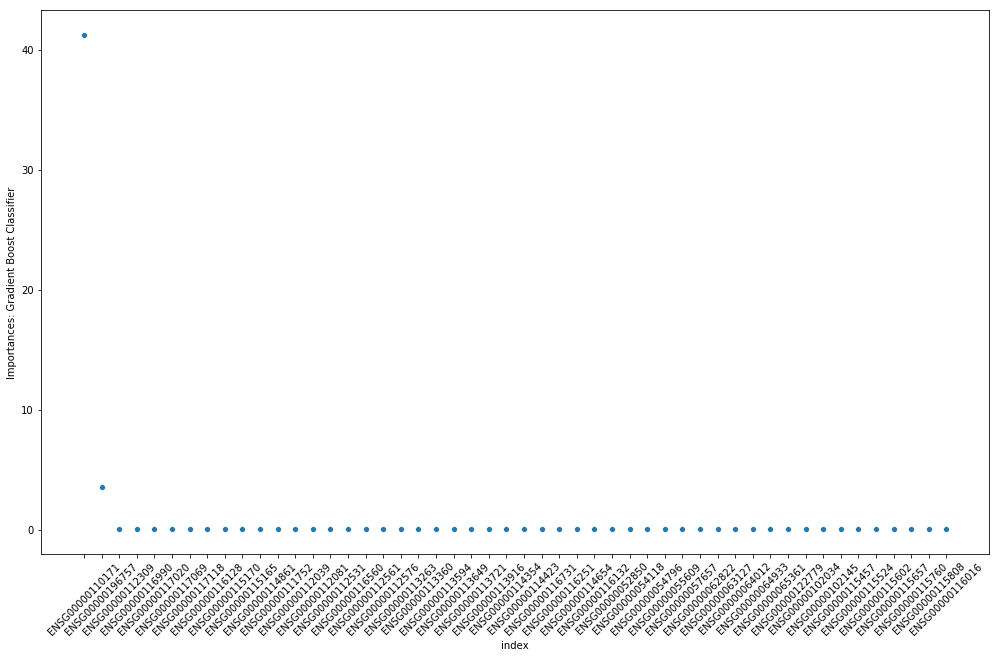

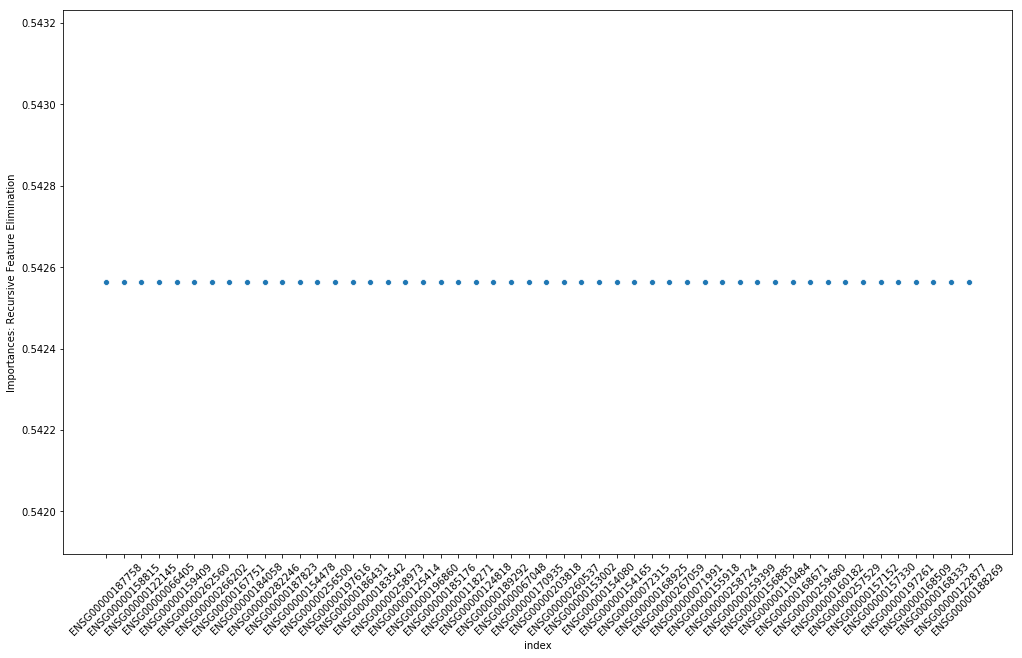

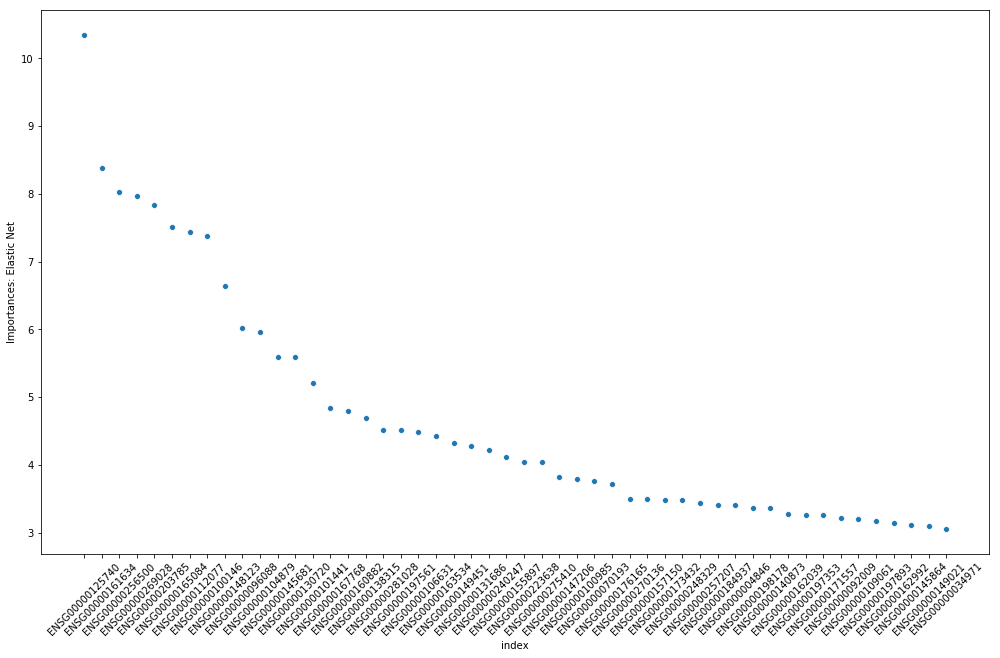

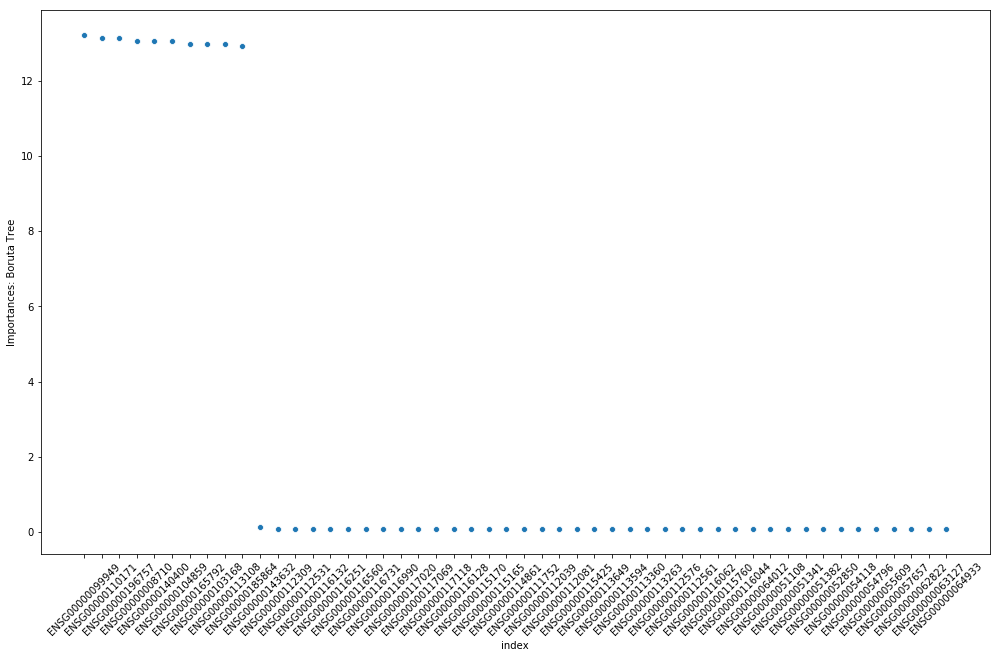

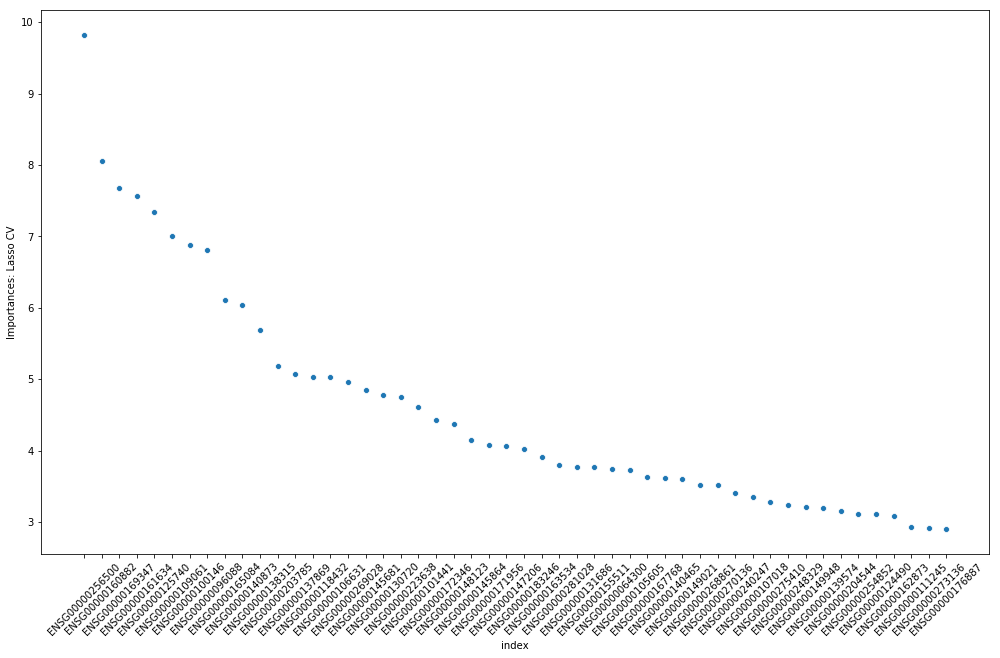

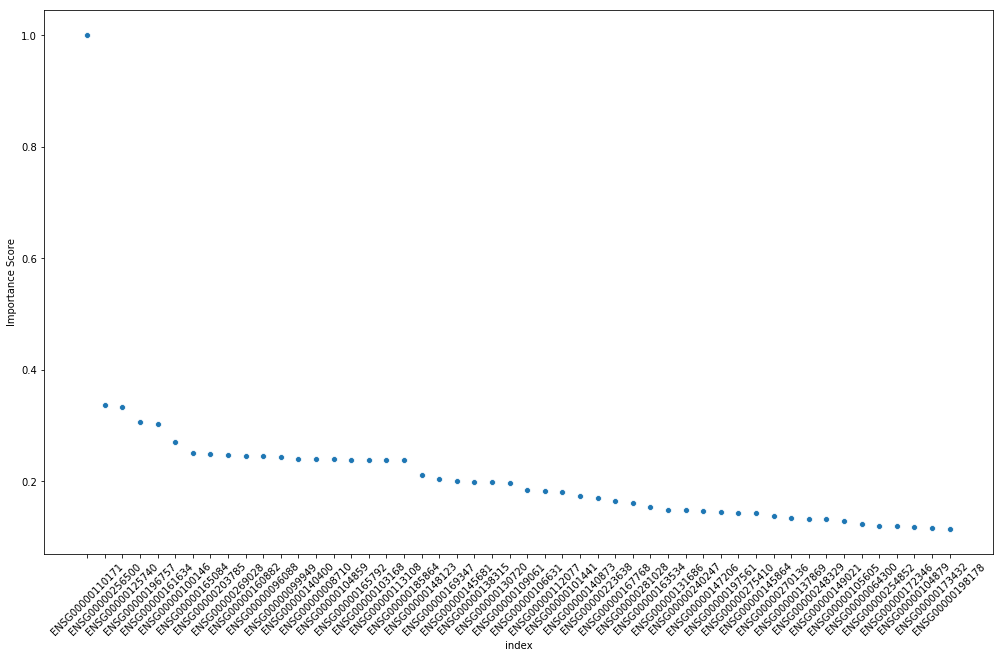

In [55]:
for x in imps:
    me.importances_scatter(results_thyroid, x, ngenes=50)

# Look at Scores

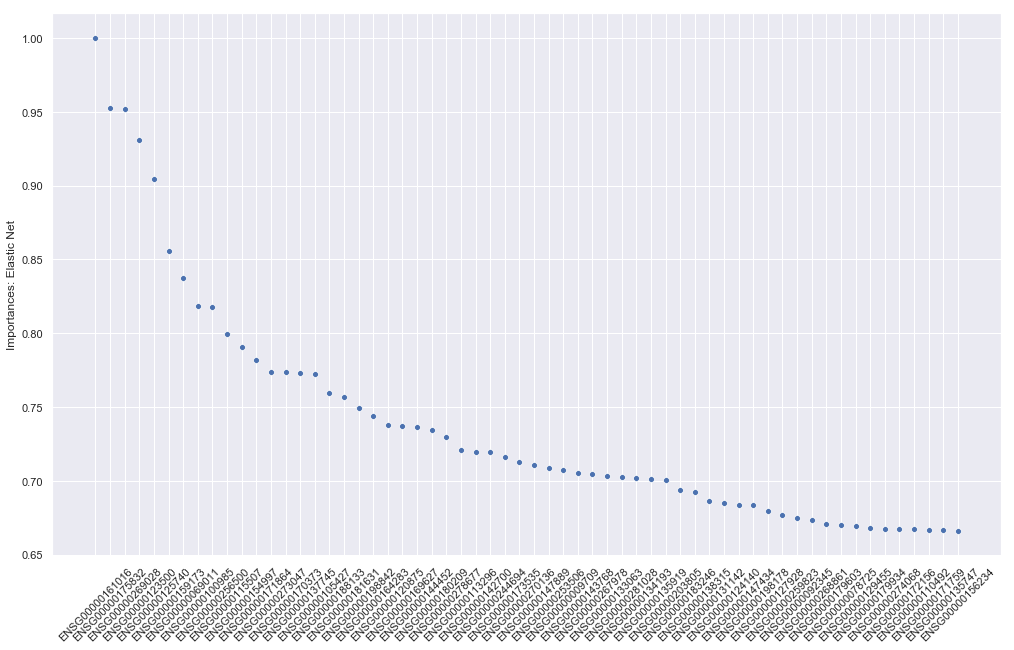

In [200]:
me.importances_scatter(results_all, "Importances: Elastic Net", ngenes = 60)

In [201]:
model_scores = me.model_scores(results_all)

In [202]:
model_scores

,Score
Gradient Boost Classifier,7.0
Recursive Feature Elimination,5.0
Elastic Net,1.0
Boruta Tree,8.0


# Create New Chunks

## Create AllCancers Chunk

In [ ]:
chunk_breast = pd.read_csv("Output/Chunk_Breast.csv")
chunk_colon = pd.read_csv("Output/Chunk_Colon.csv")
chunk_lung_a = pd.read_csv("Output/Chunk_LungAdenocarcinoma_Lung.csv")
chunk_lung_s = pd.read_csv("Output/Chunk_LungSquamousCellCarcinoma_Lung.csv")
chunk_skin = pd.read_csv("Output/Chunk_Skin.csv")
chunk_thyroid = pd.read_csv("Output/Chunk_Thyroid_ThyroidGland.csv")

chunks = [chunk_breast, chunk_colon, chunk_lung_a, chunk_lung_s, chunk_skin, chunk_thyroid]
cancers = ["breast", "colon", "lung_a", "lung_s", "skin", "thyroid"]

# T-SNE Clustering

## All Cancers

### Healthy & Cancerous

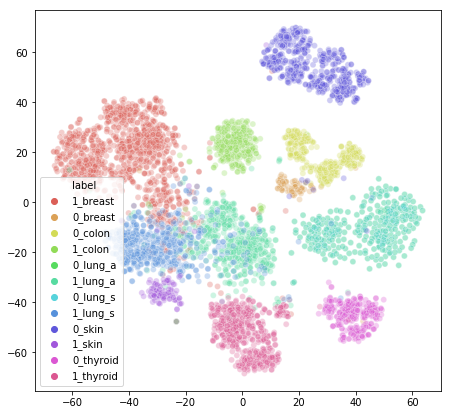

In [32]:
me.tsne_0vs1(chunk_df, nlabels = 12)

### Cancerous Only

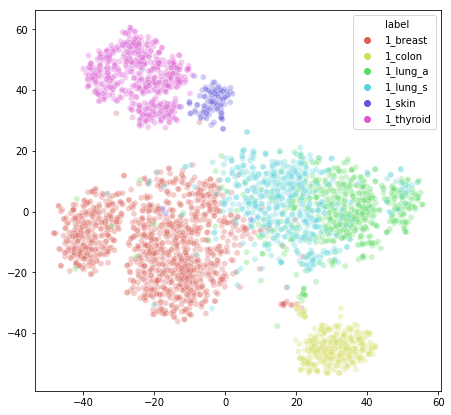

In [28]:
me.tsne_0vs1(chunk_df[chunk_df["label"].str.startswith('1')], nlabels = 6)

### Healthy Only

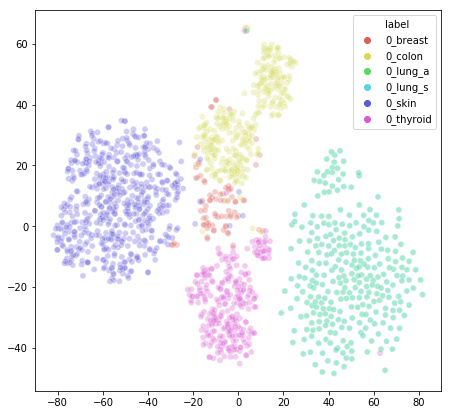

In [29]:
me.tsne_0vs1(chunk_df[chunk_df["label"].str.startswith('0')], nlabels = 6)

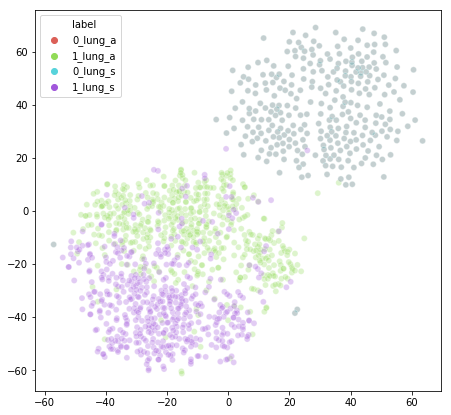

In [33]:
me.tsne_0vs1(chunk_df[chunk_df["label"].str.contains('lung')], nlabels = 4)

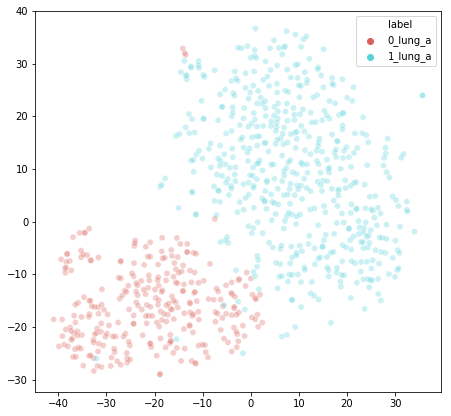

In [38]:
me.tsne_0vs1(chunk_df[chunk_df["label"].str.contains('lung_a')], nlabels = 2)

# Isolate top ten genes

In [84]:
chunk_df_skin = chunk_df[["label", 'ENSG00000110723',
 'ENSG00000213927',
 'ENSG00000250254',
 'ENSG00000090932',
 'ENSG00000136826',
 'ENSG00000115361',
 'ENSG00000170074',
 'ENSG00000204677',
 'ENSG00000006128',
 'ENSG00000126752']]

In [100]:
genes_10_thyroid = results_thyroid.head(10).index

In [103]:
genes_10_thyroid
chunk_df_thyroid = chunk_df[["label", 'ENSG00000132693', 'ENSG00000070193', 'ENSG00000039537',
       'ENSG00000149451', 'ENSG00000157150', 'ENSG00000262180',
       'ENSG00000104879', 'ENSG00000189058', 'ENSG00000111245',
       'ENSG00000197561']]

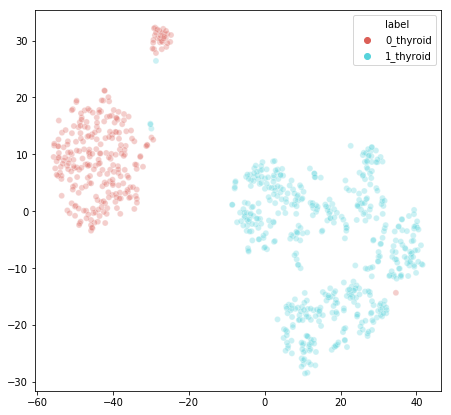

In [104]:
me.tsne_0vs1(chunk_df_thyroid[chunk_df_thyroid["label"].str.contains("thyroid")], nlabels = 2, ncols = 10)

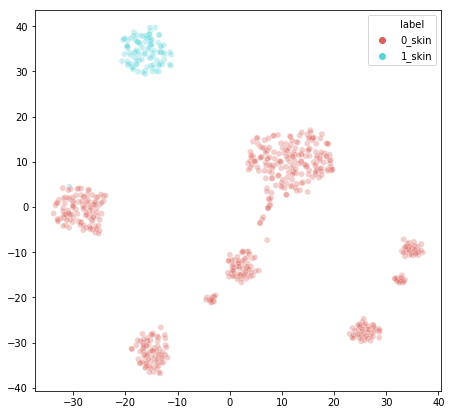

In [96]:
me.tsne_0vs1(chunk_df_skin[chunk_df_skin["label"].str.contains("skin")], nlabels = 2, ncols = 10)

In [ ]:
me.tsne_0vs1(chunk_df_skin[chunk_df_skin["label"].str.contains("lung")], nlabels = 4, ncols = 10)

# Clustering of top 10 genes

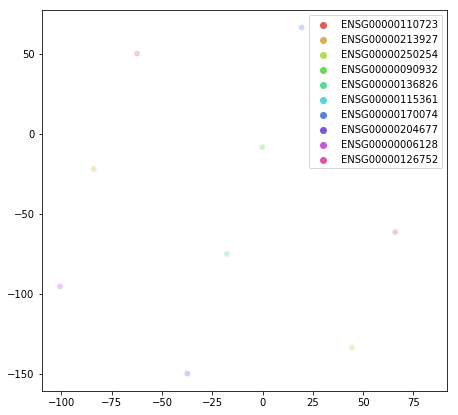

In [71]:
# Defining Model
model = TSNE(learning_rate=100)

# Fitting Model
transformed = model.fit_transform(chunk_df_skin_T)

# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x=x_axis, y=y_axis,
    hue=chunk_df_skin_T.index,
    palette=sns.color_palette("hls", 10),
    legend="full",
    alpha=0.3,
    ax=ax1)

## Clustering inside Cancer

In [106]:
chunk_df["label"].unique()

array(['1_breast', '0_breast', '0_colon', '1_colon', '0_lung_a',
       '1_lung_a', '0_lung_s', '1_lung_s', '0_skin', '1_skin',
       '0_thyroid', '1_thyroid'], dtype=object)

### Cancerous & Healthy - Lung

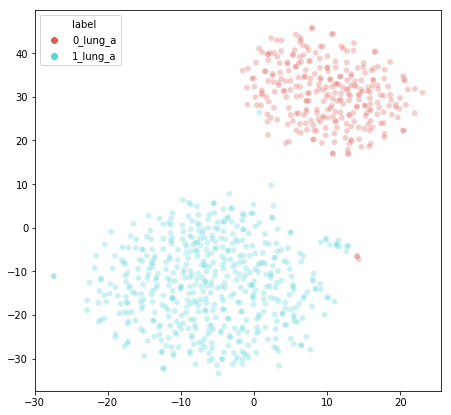

In [124]:
me.tsne_0vs1(chunk_df[chunk_df["label"].str.contains("lung_a")], nlabels = 2, ncols = 200, random_state = 123456789)

### Cancerous & Healthy - Thyroid

In [14]:
me.tsne_0vs1(chunk_df[chunk_df["label"].str.contains("thyroid")], nlabels = 2, ncols = 2, random_state = 587364)

NameError: name 'chunk_df' is not defined

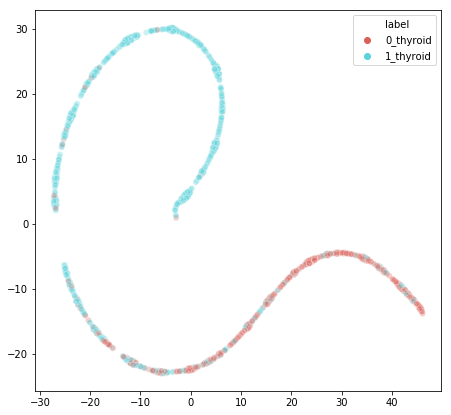

In [137]:
me.tsne_0vs1(chunk_df[chunk_df["label"].str.contains("thyroid")], nlabels = 2, ncols = 1, random_state = 58647364)

### Cancerous & Healthy - Colon

In [141]:
results_thyroid.head(100).index.tolist()

['ENSG00000132693',
 'ENSG00000070193',
 'ENSG00000039537',
 'ENSG00000149451',
 'ENSG00000157150',
 'ENSG00000262180',
 'ENSG00000104879',
 'ENSG00000189058',
 'ENSG00000111245',
 'ENSG00000197561',
 'ENSG00000185513',
 'ENSG00000179532',
 'ENSG00000129467',
 'ENSG00000108963',
 'ENSG00000155511',
 'ENSG00000124440',
 'ENSG00000184058',
 'ENSG00000124208',
 'ENSG00000159455',
 'ENSG00000105605',
 'ENSG00000137392',
 'ENSG00000250067',
 'ENSG00000173432',
 'ENSG00000239839',
 'ENSG00000163516',
 'ENSG00000162490',
 'ENSG00000204149',
 'ENSG00000144785',
 'ENSG00000267022',
 'ENSG00000021461',
 'ENSG00000160882',
 'ENSG00000267059',
 'ENSG00000122136',
 'ENSG00000100433',
 'ENSG00000275714',
 'ENSG00000172346',
 'ENSG00000197893',
 'ENSG00000170367',
 'ENSG00000281028',
 'ENSG00000110484',
 'ENSG00000162897',
 'ENSG00000022556',
 'ENSG00000163737',
 'ENSG00000137869',
 'ENSG00000154263',
 'ENSG00000170373',
 'ENSG00000147588',
 'ENSG00000141371',
 'ENSG00000275410',
 'ENSG00000240247',


In [133]:
chunk_df[chunk_df["label"].str.contains("colon")]

,Unnamed: 0,label,ENSG00000167578,ENSG00000078237,ENSG00000146083,ENSG00000158486,ENSG00000198242,ENSG00000134108,ENSG00000172137,ENSG00000276644,...,ENSG00000107863,ENSG00000213782,ENSG00000146707,ENSG00000158417,ENSG00000089177,ENSG00000186115,ENSG00000009694,ENSG00000123685,ENSG00000105063,ENSG00000181518
1159,GTEX-WQUQ-2526-SM-4MVNO,0_colon,5.21260000,2.16060000,5.14820000,-0.73460000,10.23020000,5.09170000,4.89440000,0.00140000,...,4.51230000,5.52990000,4.34920000,4.82130000,2.54370000,-0.94060000,-0.37520000,2.08780000,5.26230000,-9.96580000
1160,TCGA-D5-6929-01,1_colon,5.07860000,3.38560000,4.50720000,0.79160000,10.87210000,4.52430000,1.24550000,2.90900000,...,3.32500000,5.21030000,1.52660000,5.45820000,3.78460000,2.30770000,-9.96580000,0.26420000,4.95420000,-9.96580000
1161,TCGA-AA-3511-01,1_colon,4.88320000,3.14090000,5.67580000,0.26420000,10.56680000,4.26990000,0.22770000,2.87990000,...,3.76670000,5.04180000,3.24960000,5.18990000,3.59110000,4.46150000,-6.50640000,0.46570000,5.14040000,-9.96580000
1162,GTEX-13G51-2126-SM-5IJD9,0_colon,4.47450000,1.96750000,4.51040000,-6.50640000,10.24010000,5.04010000,0.46570000,-0.94060000,...,4.64220000,5.31360000,3.69720000,6.02190000,2.73790000,-9.96580000,1.06420000,1.32830000,4.94720000,-9.96580000
1163,TCGA-QG-A5YX-01,1_colon,4.71980000,3.40070000,4.53490000,0.43400000,10.73650000,4.77980000,-4.60820000,1.06420000,...,4.54290000,4.99690000,1.77020000,5.64240000,4.14580000,1.18970000,-9.96580000,-0.18280000,5.80270000,-9.96580000
1164,GTEX-1122O-1526-SM-5N9CL,0_colon,5.85800000,1.31090000,5.64990000,2.01470000,9.52120000,4.68430000,2.29900000,-0.10310000,...,4.73560000,4.31400000,1.96750000,4.05320000,4.01530000,3.92800000,-3.17140000,-0.15040000,4.79080000,-9.96580000
1165,GTEX-UPIC-1726-SM-4IHKG,0_colon,5.50970000,1.13160000,5.75780000,1.70530000,9.81930000,4.37020000,1.78700000,0.13880000,...,4.29140000,4.42970000,3.25870000,4.24040000,3.44370000,2.65330000,-1.68500000,0.82460000,4.94260000,-9.96580000
1166,TCGA-CM-6164-01,1_colon,4.94350000,2.64870000,5.28030000,0.53700000,10.66030000,5.15510000,1.04330000,0.97160000,...,4.36670000,5.10980000,2.18940000,5.37960000,3.58630000,3.12780000,-5.57350000,1.18970000,5.28990000,-9.96580000
1167,TCGA-A6-A567-01,1_colon,5.08450000,3.07910000,5.77590000,1.94900000,10.91630000,5.29130000,1.33400000,3.20490000,...,3.45560000,5.41280000,2.45970000,5.29390000,4.07730000,0.53700000,-6.50640000,0.72330000,5.30380000,-9.96580000
1168,TCGA-G4-6320-01,1_colon,4.95560000,1.34540000,4.52240000,-0.68730000,10.84210000,4.17160000,-3.04690000,2.31640000,...,3.03760000,4.68430000,3.16200000,4.40470000,3.08590000,-1.05590000,-9.96580000,0.09900000,5.42760000,-9.96580000


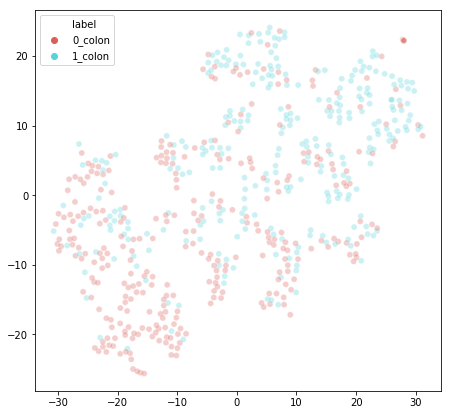

In [52]:
me.tsne_0vs1(chunk_df[chunk_df["label"].str.contains("colon")], nlabels = 2, ncols = 2, random_state = 87362)

### Cancerous Only - Breast

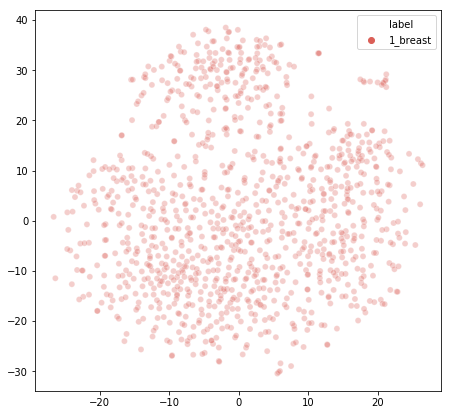

In [107]:
me.tsne_0vs1(chunk_df[chunk_df["label"].str.contains("1_breast")], nlabels = 1, ncols = 150)

### Healthy & Cancerous - Breast

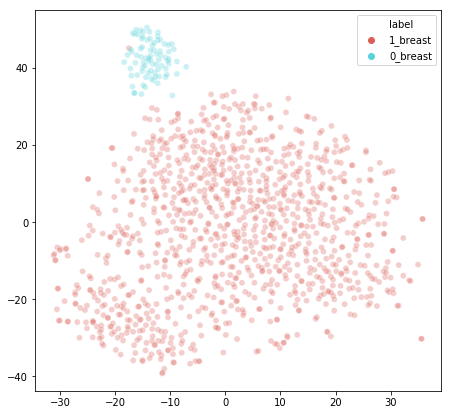

In [111]:
me.tsne_0vs1(chunk_df[chunk_df["label"].str.contains("breast")], nlabels = 2, ncols = 150)

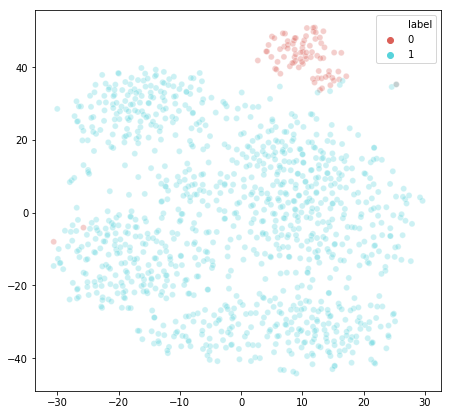

In [23]:
me.tsne_0vs1(chunk_breast, nlabels = 2)

## Comparison between two lung cancers

### Cancerous

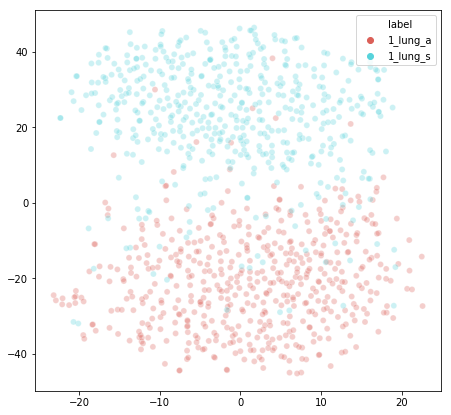

In [108]:
me.tsne_0vs1(chunk_df[chunk_df["label"].str.contains("1_lung")], nlabels = 2, ncols = 150)

### Healthy

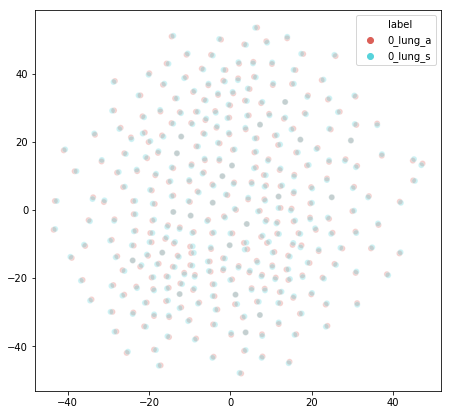

In [109]:
me.tsne_0vs1(chunk_df[chunk_df["label"].str.contains("0_lung")], nlabels = 2, ncols = 150)

In [ ]:
me.tsne_0vs1(chunk_df[chunk_df["label"].str.contains('1_breast|dog', regex=True)], nlabels = 2, ncols = 150)

# Correlation Matrices

In [57]:
genes_breast = results_breast.head(5).index.tolist()

# Hierarchical Clustering

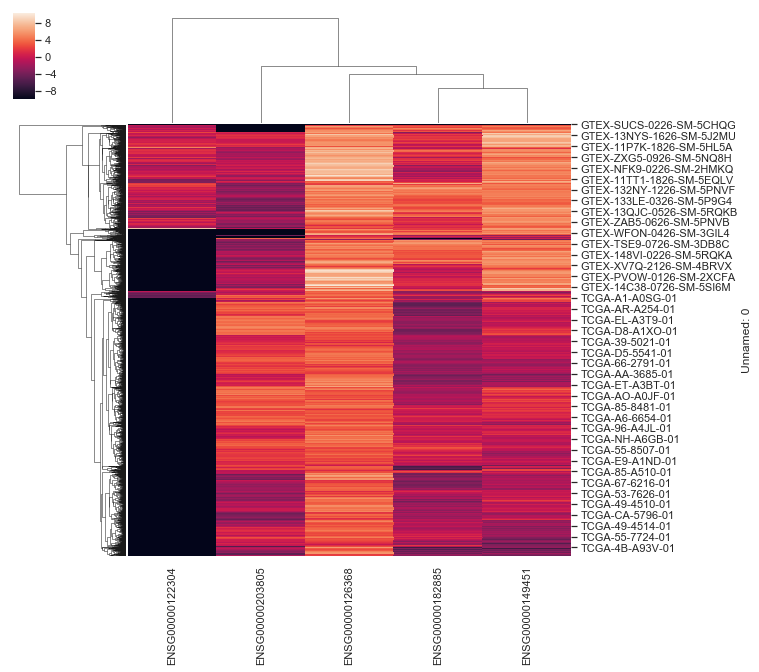

In [60]:
import seaborn as sns; sns.set(color_codes=True)

g = sns.clustermap(chunk_df[genes_breast])